### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# ResNet

*Author: Pytorch Team*

**Deep residual networks pre-trained on ImageNet**

<img src="https://pytorch.org/assets/images/resnet.png" alt="alt" width="50%"/>

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/NMA_DL_2022/Stimuli/test_HG

/content/gdrive/My Drive/NMA_DL_2022/Stimuli/test_HG


In [ ]:
model_new_1 = torch.nn.Sequential(*list(model.children()))[:-2]
model_new_1.eval()

In [ ]:
#get the a_ref
from PIL import Image
from torchvision import transforms

ref_filename = 'stimgrid_100_1  5  5  3.png' #filename of the reference picture
input_image = Image.open(ref_filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model_new_1(input_batch)

a_ref = output.squeeze(0)

In [ ]:
a_ref.shape

torch.Size([512, 7, 7])

In [ ]:
# get the pictures to be analyzed
import glob
f = glob.glob('*.png')
f.sort()

In [ ]:
f_100 = f[1]
f_5 = f[12]

import numpy as np
f = np.delete(f,1) #delete 'stimgrid_100_1  5  5  3.png'
f = np.delete(f,11) #delete 'stimgrid_5_1  5  5  3.png'

In [ ]:
f = np.insert(f, 1, f_5) #insert 'stimgrid_5_1  5  5  3.png'
f = np.insert(f, len(f), f_100)

In [ ]:
f

array(['stimgrid_0_1  5  5  3.png', 'stimgrid_5_1  5  5  3.png',
       'stimgrid_10_1  5  5  3.png', 'stimgrid_15_1  5  5  3.png',
       'stimgrid_20_1  5  5  3.png', 'stimgrid_25_1  5  5  3.png',
       'stimgrid_30_1  5  5  3.png', 'stimgrid_35_1  5  5  3.png',
       'stimgrid_40_1  5  5  3.png', 'stimgrid_45_1  5  5  3.png',
       'stimgrid_50_1  5  5  3.png', 'stimgrid_55_1  5  5  3.png',
       'stimgrid_60_1  5  5  3.png', 'stimgrid_65_1  5  5  3.png',
       'stimgrid_70_1  5  5  3.png', 'stimgrid_75_1  5  5  3.png',
       'stimgrid_80_1  5  5  3.png', 'stimgrid_85_1  5  5  3.png',
       'stimgrid_90_1  5  5  3.png', 'stimgrid_95_1  5  5  3.png',
       'stimgrid_100_1  5  5  3.png'], dtype='<U27')

In [ ]:
# get the a of each picture in f
from PIL import Image
from torchvision import transforms

dissimilarity_score_mat = np.zeros(len(f))

for i in range(0,len(f)):
  filename = f[i]
  input_image = Image.open(filename)
  preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
    output = model_new_1(input_batch)
  
  a = output.squeeze(0)
  dissimilarity_score = torch.sum(a - a_ref)
  dissimilarity_score = np.abs(dissimilarity_score.item())
  dissimilarity_score_mat[i] = dissimilarity_score


In [ ]:
dissimilarity_score_mat

array([2081.7121582 , 3354.94311523, 3434.35571289, 3435.59106445,
       3768.60229492, 4235.98583984, 4954.64941406, 5657.96777344,
       6408.31347656, 6966.46972656, 7223.92089844, 7121.32861328,
       6629.29345703, 5843.95703125, 4758.13769531, 3556.06567383,
       2049.08227539, 1012.38842773,  196.21684265,  137.00006104,
          0.        ])

In [ ]:
dissimilarity_score_mat = [dissimilarity_score_mat,dissimilarity_score_mat]

In [ ]:
np.shape(dissimilarity_score_mat)

(2, 21)

In [ ]:
mean_ds = np.mean(dissimilarity_score_mat, axis=0)
std_ds = np.mean(dissimilarity_score_mat, axis=0)

In [ ]:
mean_ds = mean_ds[::-1]
std_ds = std_ds[::-1]

In [ ]:
mean_ds[::-1]

array([   0.        ,  137.00006104,  196.21684265, 1012.38842773,
       2049.08227539, 3556.06567383, 4758.13769531, 5843.95703125,
       6629.29345703, 7121.32861328, 7223.92089844, 6966.46972656,
       6408.31347656, 5657.96777344, 4954.64941406, 4235.98583984,
       3768.60229492, 3435.59106445, 3434.35571289, 3354.94311523,
       2081.7121582 ])

In [ ]:
print(mean_ds)

None


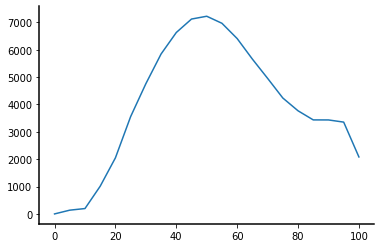

In [ ]:
plt.plot(np.linspace(0,100,21), mean_ds)

### draw the graph

In [ ]:
import csv
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
import pylab as pl
import numpy as np
import pandas as pd
from scipy import stats
from os import listdir
from os.path import isfile, join

In [ ]:
def DLfc8Grapher (filename, saved_name, frange_list, title, x_title, metric='no'):
    
    imported_file = []
    imported_file = np.genfromtxt('Data/'+filename, delimiter=',')
    # Transposes files from the original DNN Dissimilarity results output
    transposed_file = imported_file.T
    
    fc8_diss_values = transposed_file[-1] # records fc8 layer outputs
    fc8_diss_values = fc8_diss_values.tolist()
    del fc8_diss_values[0]
    fc8_diss_values = fc8_diss_values[::-1] # flip for dot lightness
    taskNames = np.arange(frange_list[0], frange_list[1]+1, frange_list[2])   
    
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]

    from matplotlib.ticker import FormatStrFormatter
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.plot(taskNames[::-1], fc8_diss_values, 'k', linewidth=2.0)
    #plt.title(title)
    plt.xlabel(x_title, fontsize=18)
    plt.ylabel('Rep. dissimilarity, $R$', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    if metric == 'yes':
        score = concavity_metric(fc8_diss_values)
        plt.text(0.05*max(taskNames), 0.05*max(fc8_diss_values), 'Concavity Score = ' + str(round(score, 3)))
    
    plt.tight_layout()
    plt.xlim(np.min(taskNames), np.max(taskNames))
    plt.ylim(0,None)
    plt.gca().invert_xaxis()
    #plt.savefig('Figures/FIGURES/'+saved_name+'.png', dpi=800)
    plt.show()


def concavity_metric (task_values):
    '''
    DEPRECATED
    '''
    # Assigns a score of concavity based on the positive differences between the initial and subsequent values
    score = 0
    initial_task = task_values[0]
    for task in task_values:
        if task >= initial_task:
            score += task-initial_task
#        else:
#            break # terminates after first sub-initial value (so score looks only at first region)
    return (score)


def AVG_DLfc8Grapher (filename, saved_name, frange_list, title, x_title, labels, metric='no', norm=False, show_title=False):
    '''
    norm = True --> normalize by average R
    '''
    
    # read file
    imported_file = []
    imported_file = np.genfromtxt('Data/'+filename, delimiter=',')
    
    # normalize
    if norm is True:
        #row_sums = np.sum(imported_file,axis=1)
        row_means = np.mean(imported_file,axis=1)
        for row in range(imported_file.shape[0]):
            if row_means[row] > 0:
                imported_file[row,:] = imported_file[row,:]/row_means[row]
    
    # get average and error bars
    fc8_diss_values = np.mean(imported_file, axis=0)
    #sems = np.std(imported_file, axis=0)
    #lower = fc8_diss_values - sems
    #upper = fc8_diss_values + sems
    lower = np.percentile(imported_file, 25, axis=0)
    upper = np.percentile(imported_file, 75, axis=0)
    
    # get task names
    taskNames = np.arange(frange_list[0], frange_list[1]+1, frange_list[2])   
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]

    # plot figure
    from matplotlib.ticker import FormatStrFormatter
    fig, ax = plt.subplots()
    if show_title is True:
        plt.title(title, fontsize=24)
    plt.plot(taskNames[::-1], fc8_diss_values, 'k', linewidth=2.0)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.fill_between(taskNames[::-1], lower, upper, facecolor='k', alpha=0.1)
    if labels[0] is True:
        plt.ylabel('Rep. dissimilarity, $R$', fontsize=22)
    elif labels[0] is 'r':
        plt.ylabel('Rep. dissimilarity, $r$', fontsize=22)
    else:
        plt.ylabel('  ', fontsize=22)
    if labels[1] is True:
        plt.xlabel(x_title, fontsize=22)
    else:
        plt.xlabel('  ', fontsize=22)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(np.min(taskNames), np.max(taskNames))
    plt.ylim(0,None)
    plt.gca().invert_xaxis()
    plt.tight_layout()
#    plt.savefig('Figures/FIGURES/AVG_'+saved_name+'.png', dpi=800)
    plt.show()

In [ ]:
%cd ../..

/content/gdrive/MyDrive/NMA_DL_2022


In [ ]:
AVG_DLfc8Grapher('dissimilarity_score_mat', 'SG_Illusion', [0, 1.00, 0.05], 'HG_Illusion', 'Disk luminance, $\mu$', labels=[True, True],norm=True)

AxisError: ignored

In [ ]:
imported_file = []
imported_file = np.genfromtxt('Data/dissimilarity_score_mat', delimiter=',')

In [ ]:
imported_file

array([nan, nan])

In [ ]:
imported_file.T.shape

(2,)

In [ ]:
imported_file = np.genfromtxt('Data/'+'vgg19/MATLAB_vgg19L1_white_to_black__SG', delimiter=',') #the data file we need

In [ ]:
imported_file.T.shape 
#the data sent to the graph generation code
#375 groups of photos (black,grey,white)
#21=3*7;(7*7)

(21, 375)